In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/MyDrive/Data/Temp_Provincias.csv', sep=';', decimal='.')

In [4]:
df.head()

,FECHA,Provincia,T. Máxima,T.Mínima
0,01/01/2018,Madrid,11.6,3.6
1,02/01/2018,Madrid,13.4,7.5
2,03/01/2018,Madrid,13.5,7.6
3,04/01/2018,Madrid,13.7,7.8
4,05/01/2018,Madrid,11.5,5.8


In [5]:
df.FECHA=pd.to_datetime(df.FECHA, format="%d/%m/%Y")

In [6]:
df.set_index('FECHA').resample('W')

In [7]:
df.head()

,FECHA,Provincia,T. Máxima,T.Mínima
0,2018-01-01,Madrid,11.6,3.6
1,2018-01-02,Madrid,13.4,7.5
2,2018-01-03,Madrid,13.5,7.6
3,2018-01-04,Madrid,13.7,7.8
4,2018-01-05,Madrid,11.5,5.8


In [8]:
df.columns

Index(['FECHA', 'Provincia', 'T. Máxima', 'T.Mínima'], dtype='object')

In [9]:
df = df.set_index('FECHA')
df.head()

,Provincia,T. Máxima,T.Mínima
FECHA,,,
2018-01-01,Madrid,11.6,3.6
2018-01-02,Madrid,13.4,7.5
2018-01-03,Madrid,13.5,7.6
2018-01-04,Madrid,13.7,7.8
2018-01-05,Madrid,11.5,5.8


In [10]:
sevilla_df = df[df["Provincia"] == "Sevilla"]

In [11]:
sevilla_df.head()

,Provincia,T. Máxima,T.Mínima
FECHA,,,
2018-01-01,Sevilla,18.6,5.3
2018-01-02,Sevilla,18.3,3.4
2018-01-03,Sevilla,19.2,9.7
2018-01-04,Sevilla,16.0,11.8
2018-01-05,Sevilla,16.4,12.5


In [12]:
sevilla_df.columns

Index(['Provincia', 'T. Máxima', 'T.Mínima'], dtype='object')

In [13]:
sevilla_df['Temp_Media'] = sevilla_df[['T. Máxima','T.Mínima']].mean(axis=1)
sevilla_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Provincia,T. Máxima,T.Mínima,Temp_Media
FECHA,,,,
2018-01-01,Sevilla,18.6,5.3,11.95
2018-01-02,Sevilla,18.3,3.4,10.85
2018-01-03,Sevilla,19.2,9.7,14.45
2018-01-04,Sevilla,16.0,11.8,13.90
2018-01-05,Sevilla,16.4,12.5,14.45


In [14]:
sevilla_df.head()

,Provincia,T. Máxima,T.Mínima,Temp_Media
FECHA,,,,
2018-01-01,Sevilla,18.6,5.3,11.95
2018-01-02,Sevilla,18.3,3.4,10.85
2018-01-03,Sevilla,19.2,9.7,14.45
2018-01-04,Sevilla,16.0,11.8,13.90
2018-01-05,Sevilla,16.4,12.5,14.45


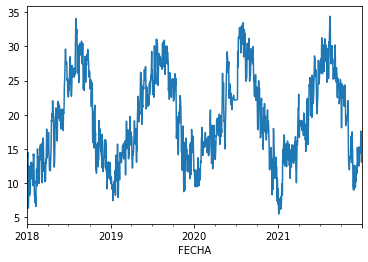

In [15]:
sevilla_df['Temp_Media'].plot()

In [16]:
# create timeseries readable by fbprophet
ts = pd.DataFrame({'ds':sevilla_df.index,'y':sevilla_df.Temp_Media})
#ts['cap'] = 30000 # unused in linear growth
#ts['floor'] = 0 # unused in linear growth
ts.head()

,ds,y
FECHA,,
2018-01-01,2018-01-01,11.95
2018-01-02,2018-01-02,10.85
2018-01-03,2018-01-03,14.45
2018-01-04,2018-01-04,13.90
2018-01-05,2018-01-05,14.45


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


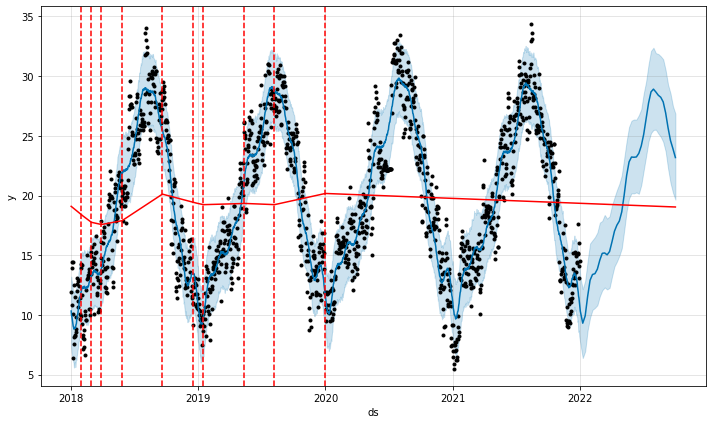

In [17]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
# instantiate the model and fit the timeseries
prophet = Prophet(changepoint_range=0.5,changepoint_prior_scale=0.5)
prophet.fit(ts)

# create a future data frame 
future = prophet.make_future_dataframe(periods=40, freq='W') #documentación para ver cómo poner semanas
forecast = prophet.predict(future)

# display the most critical output columns from the forecast
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

# plot
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(),prophet,forecast)
#fig

In [18]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-01,10.322618,7.334974,13.203322
1,2018-01-02,9.968847,6.838241,12.852993
2,2018-01-03,9.863064,6.781930,12.805868
3,2018-01-04,9.639983,6.578249,12.660336
4,2018-01-05,9.450144,6.460531,12.372317


In [19]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1496,2022-09-04,19.069046,23.700957,30.496224,17.404376,20.923183,7.854547,7.854547,7.854547,-0.024882,-0.024882,-0.024882,7.879429,7.879429,7.879429,0.0,0.0,0.0,26.923592
1497,2022-09-11,19.061149,22.254641,29.286184,17.317462,20.970636,6.606544,6.606544,6.606544,-0.024882,-0.024882,-0.024882,6.631426,6.631426,6.631426,0.0,0.0,0.0,25.667693
1498,2022-09-18,19.053253,21.055432,28.549623,17.234605,21.045456,5.547031,5.547031,5.547031,-0.024882,-0.024882,-0.024882,5.571913,5.571913,5.571913,0.0,0.0,0.0,24.600284
1499,2022-09-25,19.045356,20.244082,27.482465,17.106160,21.131522,4.874018,4.874018,4.874018,-0.024882,-0.024882,-0.024882,4.898900,4.898900,4.898900,0.0,0.0,0.0,23.919374
1500,2022-10-02,19.037460,19.652945,26.860664,17.009838,21.214483,4.143442,4.143442,4.143442,-0.024882,-0.024882,-0.024882,4.168324,4.168324,4.168324,0.0,0.0,0.0,23.180902


In [20]:
# Guardamos el resultado en un fichero csv separado por comas. 
forecast.to_csv('temp_sevilla.csv',  index=False, sep=";", decimal=",")